# Welcome to Stastical Pitfalls in Python!

In this interactive introductory lesson we will be learning about the potential shortcomings of statistics using coding in Python. 

We will be understanding and exploring: 1) how to simulate different types of data, 2) the importance of means, variance and sample size in data, 3) type I/II error and statistical power, 4) polynomial modelling, 5) extrapolation and 6) under and overfitting 

This course assumes some frequentist statistics with some very basic python knowlege 

Make sure to read and understand all lines as there is explanations within the code

Loading in required packages 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import t

# Simulating data

## Simulating a single variable 
Here we first simulate a hypothetical variable x with a mean value of 0, standard deviation of 10 with 100000 data points that have a normal/gaussian distribution.

Simulations use a random process to come up with hypothetical data points - run code several times and see how the graphs change.

Both histograms and violin plots can be used to visulise this simulations 

Text(0.5, 0, 'density')

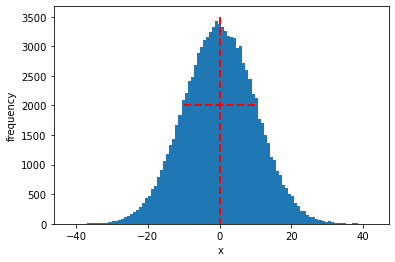

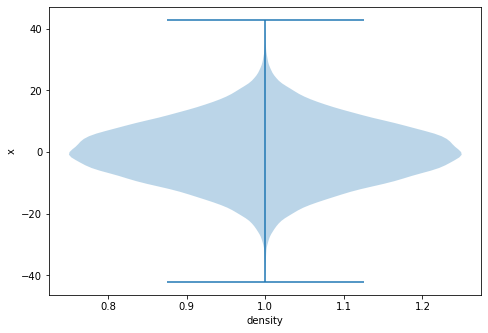

In [436]:
#paramters of simulation 
mean=0 #average value 
sd=10 #standard deviation
sample=100000 #sample size

x = np.random.normal(mean, sd, sample) #randomly simulating with a normal distribution of chosen paramters

plot1 = plt.hist(x, bins=100) #plotting a histogram of x, with 100 bars 

plt.plot([0,0],[3500,0], color='red', linestyle='dashed', linewidth=2) #vertical red line showing the mean 
plt.plot([-10,10],[2000,2000], color='red', linestyle='dashed', linewidth=2) #horizontal dashed line showing the standard deviation

#histogram axis labels 
plt.xlabel("x")
plt.ylabel("frequency")

#violin plot - shows data density at each x value 
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(x)
plt.ylabel("x")
plt.xlabel("density")

We can change the simualted mean value - see how our distribution has shifted 

Text(0.5, 0, 'density')

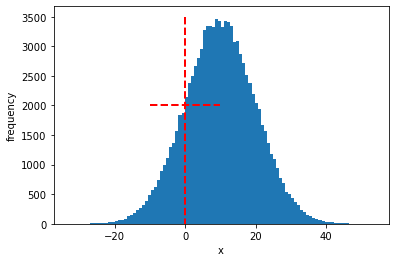

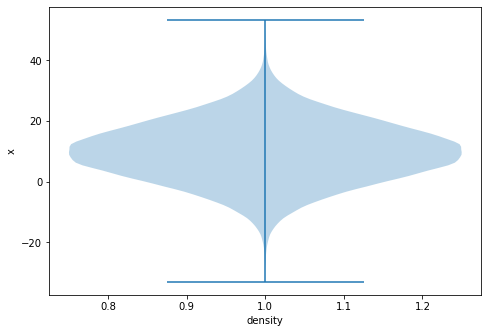

In [437]:
#code is mostly the same - spot how the graphs change based off the small code change 
mean=10 #change here
sd=10
sample=100000

x = np.random.normal(mean, sd, sample) 
plot1 = plt.hist(x, bins=100)

#The mean and SD lines from the previous example have not been changed for comparison
plt.plot([0,0],[3500,0], color='red', linestyle='dashed', linewidth=2) 
plt.plot([-10,10],[2000,2000], color='red', linestyle='dashed', linewidth=2)

plt.xlabel("x")
plt.ylabel("frequency")

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(x)
plt.ylabel("x")
plt.xlabel("density")

We can change the simualted standard deviaition value - see how our distribution has widened 

Text(0.5, 0, 'density')

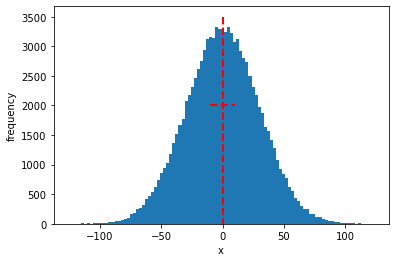

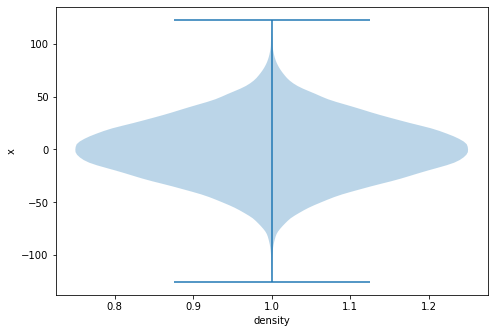

In [730]:
mean=0
sd=30 #change here
sample=100000 

x = np.random.normal(mean, sd, sample)
plot1 = plt.hist(x, bins=100)

plt.plot([0,0],[3500,0], color='red', linestyle='dashed', linewidth=2)
plt.plot([-10,10],[2000,2000], color='red', linestyle='dashed', linewidth=2)
plt.xlabel("x")
plt.ylabel("frequency")

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(x)
plt.ylabel("x")
plt.xlabel("density")


We can change the number of simulated data points, mimicking different sample sizes.

Run this code several times and see how less simulated data is less representive of the mean and standard deviation and is more subject to the 'randomness' of the simulation.

Text(0.5, 0, 'density')

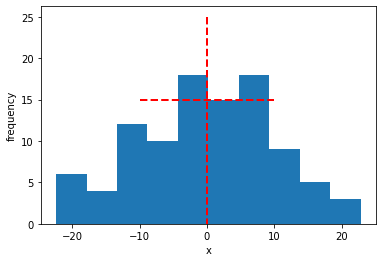

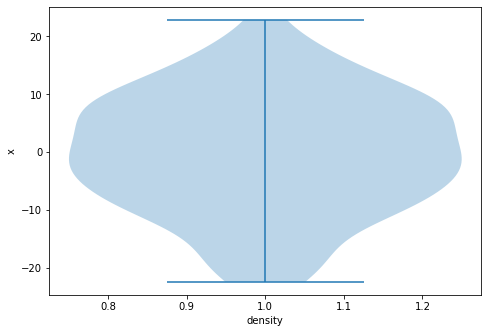

In [733]:
mean=0
sd=10
sample=100 #change here

x = np.random.normal(mean, sd, sample) 

plt.hist(x, bins=10)

plt.plot([0,0],[25,0], color='red', linestyle='dashed', linewidth=2)
plt.plot([-10,10],[15,15], color='red', linestyle='dashed', linewidth=2)

plt.xlabel("x")
plt.ylabel("frequency")

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(x)
plt.ylabel("x")
plt.xlabel("density")

## We can also simulate covarying variables 
- We can simulate another variable called Y that has a relationship with the value of X (e.g. as x increases, y increases) 
- There is variance in this data with the realtionship between x and y taken into account 

Text(0, 0.5, 'y')

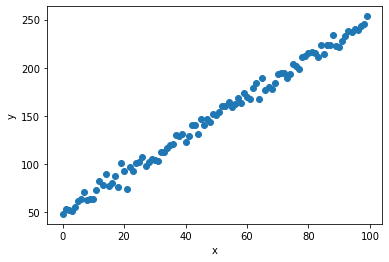

In [14]:
x=range(100) # creates a list of numbers for x, from 0 up to but not including 100
y=[] #creates empty object y that can be filled up 

sd=5

#this simulates y, with a normal distribution depending on SD, according to each x value and the relationship between x and y
for i in x:
      y.append(np.random.normal(2*i+50, sd, 1)) #this is a y=2x+50 relationship; we write this relationship using i instead of x as we are running a loop 
        
plot=plt.scatter(x,y) #scatter plot
plt.xlabel("x")
plt.ylabel("y")

##Simulations can be used for more complicated relationships 
E.g. Below we can simulate a binomial distribution - when the data can be one of two options e.g. heads or tails for a coin toss 
or pass or fail for an exam 
Don't worry too much about this but just know its possible


Text(0, 0.5, 'frequency')

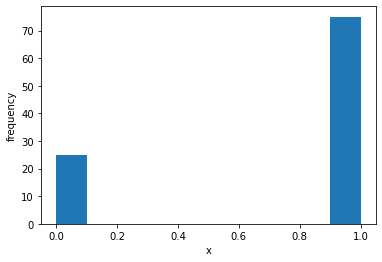

In [17]:
sample=100
probability=0.75 #probability of one of the events happening, where the probability of the other event is 1-p

plt.hist(np.random.binomial(1,probability, sample)) #events are given as 1 or 0 where 1 has a probility of 0.75
plt.xlabel("x")
plt.ylabel("frequency")

#Simulating a single variable: height 
Here we use a real world example demonstrating how poor sampling and statistical decisions can cause incorrect inferences about height

#How does sample size affect the accuracy of mean estimation?


Text(0, 0.5, 'Height Estimation (cm)')

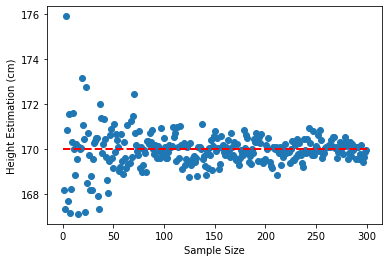

In [21]:
mean=170 #Average height is approx 170cm
sd=6 #Standard deviation is approx 6cm
sample=300 #Simulating a sample size of up to 300 random people 

x=range(1,sample) #creating sample sizes from 1 up to 300
y_data=[] #creating an empty object for each sample size
y=[] #creating an empty object for the means of each sample size


for i in x:
    y_data.append(np.random.normal(mean, sd, i)) #loop simulating height using a sample size ranging from 1 to 300

#What would the object y_data look like?


for i in range(0,sample-1):
    y.append(y_data[i].mean()) #loop finding the means for each sample size of y_data
    
 #see how the scatter plot shows points randomly distributed around the mean but gets closer with sample size 
plt.scatter(x,y) 
plt.plot([0,300],[170,170], color='red', linestyle='dashed', linewidth=2) #line showing mean 
plt.xlabel("Sample Size")
plt.ylabel("Height Estimation (cm)")

#How does the standard deviation of the data affect mean estimation?


Text(0.5, 0, 'Standard deviation')

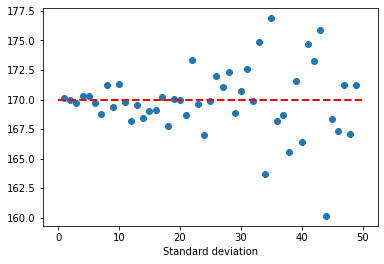

In [30]:
mean=170
sd=50 #What if SD of height was up to 50 cm instead of 6cm?
sample=100

x=range(1,sd)
y_data=[]
y=[]


for i in x:
    y_data.append(np.random.normal(mean, i, sample)) #loop simulating height using a SD ranging from 1 to 50


for i in range(0,sd-1):
    y.append(y_data[i].mean())
    
#see how the scatter plot shows points randomly distributed around the mean but gets larger with SD 
#This is why data with large standard deviations should have a large sample size
plot1=plt.scatter(x,y) 
plt.plot([0,50],[170,170], color='red', linestyle='dashed', linewidth=2)

plt.xlabel("Standard deviation")
plt.ylabel("Height Estimation (cm)")



#We can simulate differences in height between men and women 

Using the scipy stats package, we can test if there is statistical differences between the two groups

t=7.061929879479099, p=2.7198642964413897e-11


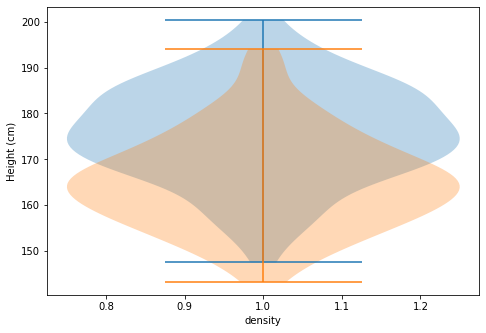

In [462]:
mean_male=175 #mean height of men
mean_female=165 #mean height of women 

sd=10
sample=100

male=np.random.normal(mean_male, sd, sample) #simulations of men and women are sepperate
female=np.random.normal(mean_female, sd, sample)

#students t test commparing the two groups
t_stat, p = ttest_ind(male, female)
print(f't={t_stat}, p={p}')

#plot comparing are simulated data 
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(male)
ax.violinplot(female)
plt.ylabel("Height (cm)")
plt.xlabel("density")



##Type II error 
The incorrect acceptance of the a false null hypothesis - "false negative"
Liable to occur when:

In [ ]:
Small mean difference between groups 
Run this code several times

t=1.4061803458772175, p=0.16123799770564284


Text(0.5, 0, 'density')

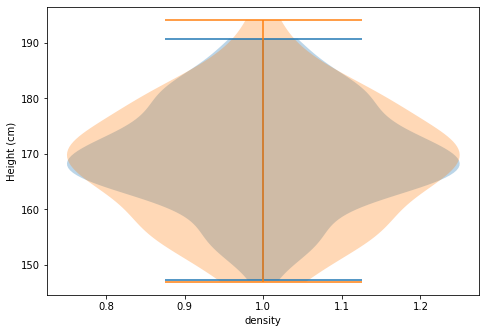

In [479]:
mean_male=171 #men are simulated to only be 2 cm taller than women on average
mean_female=169

sd=10
sample=100

male=np.random.normal(mean_male, sd, sample)
female=np.random.normal(mean_female, sd, sample)

t_stat, p = ttest_ind(male, female)
print(f't={t_stat}, p={p}')

#see how the plots are much closer together and our p value is more likely to be >0.05
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(male)
ax.violinplot(female)
plt.ylabel("Height (cm)")
plt.xlabel("density")

In [ ]:
High Variance within groups 
Run this code several times

t=1.0759391363681587, p=0.2832637497155332


Text(0.5, 0, 'density')

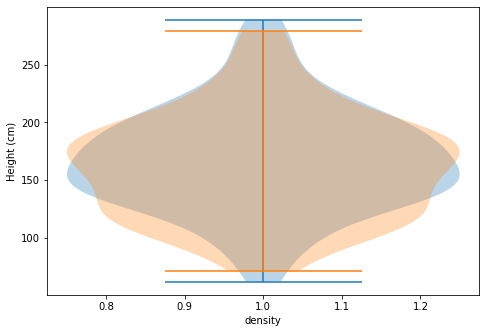

In [485]:
mean_male=175
mean_female=165

sd=50 #large standard deviation 
sample=100

male=np.random.normal(mean_male, sd, sample)
female=np.random.normal(mean_female, sd, sample)

t_stat, p = ttest_ind(male, female)
print(f't={t_stat}, p={p}')

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(male)
ax.violinplot(female)
plt.ylabel("Height (cm)")
plt.xlabel("density")

Low sample size
Run this code several times

t=4.624832112242755, p=0.0002104448491963768


Text(0.5, 0, 'density')

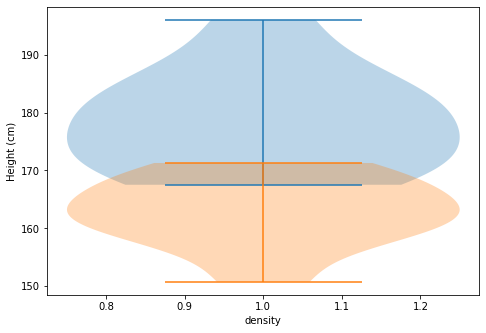

In [500]:
mean_male=175
mean_female=165

sd=10
sample=10 #small simulated sample size

male=np.random.normal(mean_male, sd, sample)
female=np.random.normal(mean_female, sd, sample)

t_stat, p = ttest_ind(male, female)
print(f't={t_stat}, p={p}')

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(male)
ax.violinplot(female)
plt.ylabel("Height (cm)")
plt.xlabel("density")

##Type I error 
The incorrect rejection of a true null hypothesis - "false positive".
If there is actually no difference between heights of men and women.
Liable to occur when:

Low sample size
Run this code several times and we will occasionally get a p value <0.05

t=0.7546411016680716, p=0.45227400546696994


Text(0.5, 0, 'density')

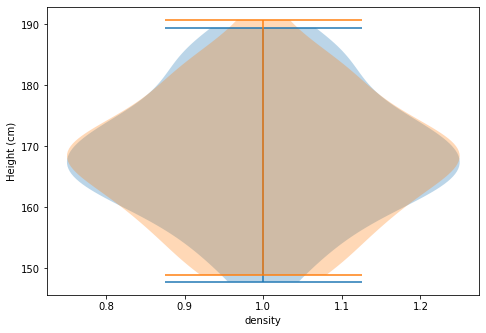

In [664]:
mean_male=170 #men and women are simulated to be the same height
mean_female=170

sd=10
sample=50

male=np.random.normal(mean_male, sd, sample)
female=np.random.normal(mean_female, sd, sample)

t_stat, p = ttest_ind(male, female)
print(f't={t_stat}, p={p}')

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.violinplot(male)
ax.violinplot(female)
plt.ylabel("Height (cm)")
plt.xlabel("density")

##Problems with simulating a  complex polynomial relationship

## We can model height and age  in children using the formula: 
Height =-0.004*age^3 -0.25*age^2 +12.5*age +50

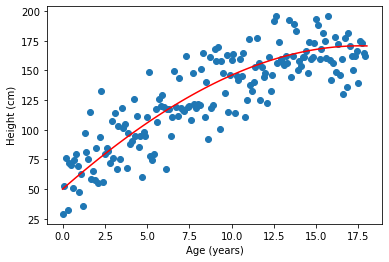

In [719]:
x=np.arange(0,18,0.1) #use NumPy library to have a float increment 
y=[]

sd=20

for i in x:
      y.append(np.random.normal(-0.004*i**3-0.25*i**2+12.5*i+50, sd, 1))
        
plot=plt.scatter(x,y) 
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")

#plotting in red the modelled relationship 
x = np.linspace(0,18,100)
y=-0.004*x**3-0.25*x**2+12.5*x+50
plt.plot(x,y, 'r')

#Extrapolation 
Inferring the relationship between two variables outside of the data range can lead to very incorrect predicitons, especially when using polynomial relationships 

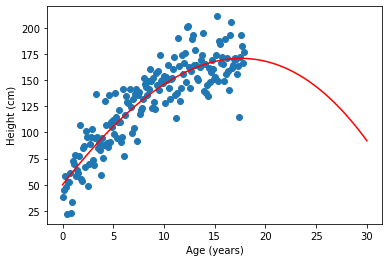

In [723]:
x=np.arange(0,18,0.1) #need to use NumPy library to have a float increment 
y=[]

sd=20

for i in x:
      y.append(np.random.normal(-0.004*i**3-0.25*i**2+12.5*i+50, sd, 1))
        
plot=plt.scatter(x,y) 
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")

#In this example our model would predict 30 year olds being the same size as 5 year olds 
x = np.linspace(0,30,100)
y=-0.004*x**3-0.25*x**2+12.5*x+50
plt.plot(x,y, 'r')

##model underfitting 
When you do not have enough data points to model a complex relationship 

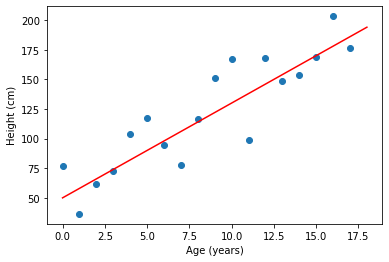

In [31]:
x=np.arange(0,18,1) #small number of data points  
y=[]

sd=20

for i in x:
      y.append(np.random.normal(-0.004*i**3-0.25*i**2+12.5*i+50, sd, 1))
        
plot=plt.scatter(x,y) 
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")

# you could very easily model a linear relationship here which would not capture the true complexity of the system 
x = np.linspace(0,18,100)
y=8*x+50
plt.plot(x,y, 'r')

##model overfitting 
When you end up modelling the random noise in the data rather than the relationships between variables

Text(0, 0.5, 'Height (cm)')

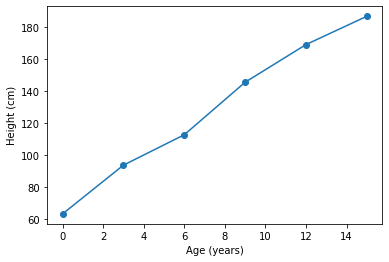

In [32]:
x=np.arange(0,18,3) #need to use NumPy library to have a float increment 
y=[]

sd=20

for i in x:
      y.append(np.random.normal(-0.004*i**3-0.25*i**2+12.5*i+50, sd, 1))
 
#forcing lines of best fit to linearly attach between data points 
plot=plt.scatter(x,y) 
plt.plot(x, y)
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")

Congratualtions you finished!
William Singleton ws313@exeter.ac.uk 02/01/2022